['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


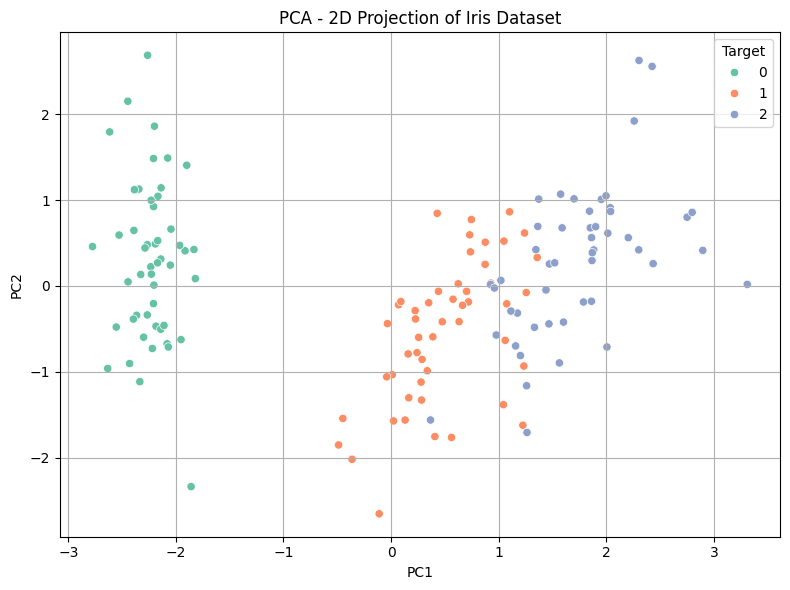

In [8]:
# Dimensionality Reduction using PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load Iris dataset (high-dimensional sample dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Show column names and first few rows
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.columns.tolist())
print(df.head())

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

# Scatter plot of reduced dimensions
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Target', palette='Set2')
plt.title('PCA - 2D Projection of Iris Dataset')
plt.grid(True)
plt.tight_layout()
plt.show()

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2020-01-22  25.070000  28.200001  24.940001  24.978001  24.978001  149300
2020-01-23  24.920000  25.020000  24.879999  24.995001  24.995001   39500
2020-01-24  24.940001  24.940001  24.809999  24.864000  24.864000   27000
2020-01-27  24.620001  24.650000  24.598000  24.598000  24.598000   24300
2020-01-28  24.700001  24.799999  24.650000  24.700001  24.700001   55500


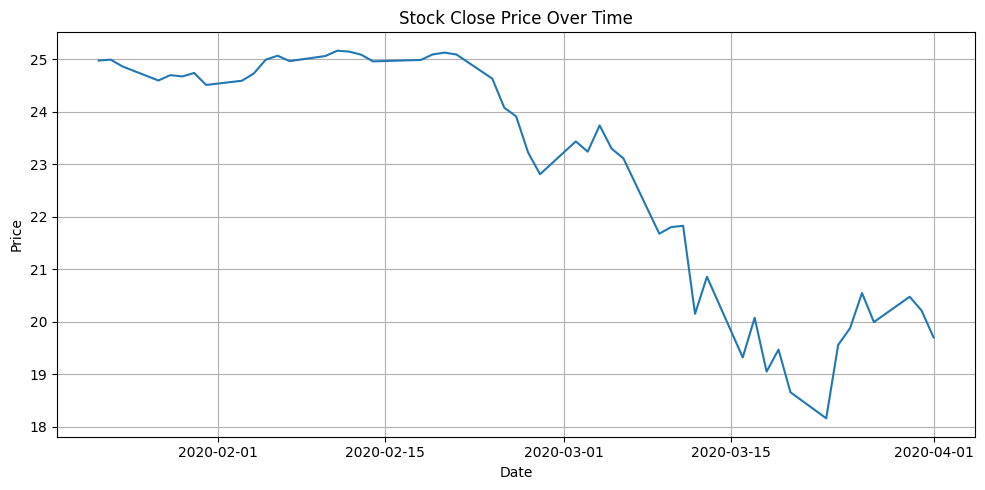

C:\Users\Fazal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Fazal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Fazal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Fazal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

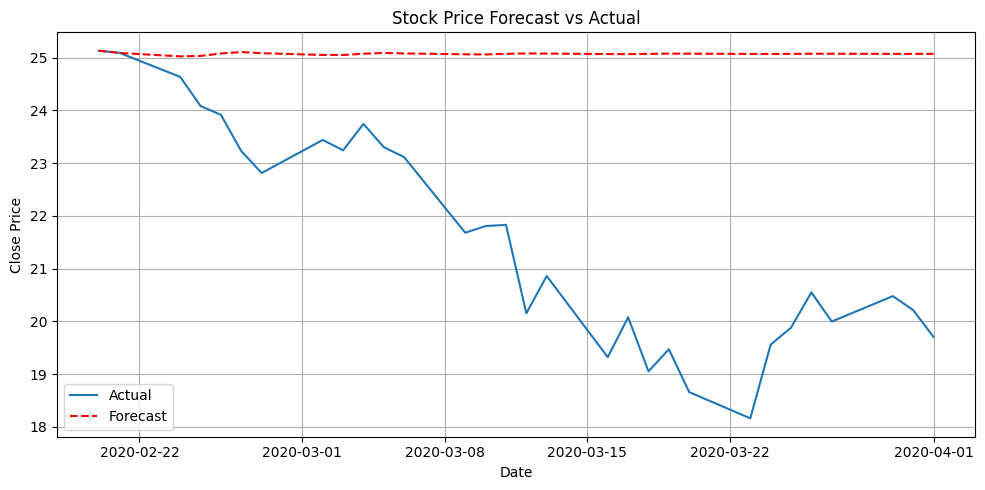


Model Evaluation:
MAE: 3.50
RMSE: 4.05
MAPE: 17.25%


In [14]:
# Stock Price Prediction using ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Load dataset
df = pd.read_csv(r"C:\Users\Fazal\OneDrive\Desktop\Internship\Task-7\stock_prices.csv", parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Show column names and first few rows
print(df.columns.tolist())
print(df.head())

# Fill missing values if any
df['Close'] = df['Close'].ffill()

# EDA: Plot Close Price
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close Price')
plt.title("Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Engineering: Lag & Moving Average
df['Lag_1'] = df['Close'].shift(1)
df['Rolling_Mean_5'] = df['Close'].rolling(window=5).mean()

# Drop missing rows from lag/rolling calculations
df.dropna(inplace=True)

# Train-Test Split
train = df['Close'][:-30]
test = df['Close'][-30:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # adjust p,d,q as needed
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)
forecast.index = test.index

# Plot forecast vs actual
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--', color='red')
plt.title('Stock Price Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation Metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast)

print(f"\nModel Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape*100:.2f}%")